In [165]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
df= DataFrame(np.random.randint(1,10,8).reshape(2,4),columns=['A','B','C','D'],index=[1,2])

In [167]:
df

,A,B,C,D
1,1,6,1,7
2,4,2,3,5


In [168]:
dff=DataFrame({1:[1,2],2:[3,4]},index=['a','b'])
dff

,1,2
a,1,3
b,2,4


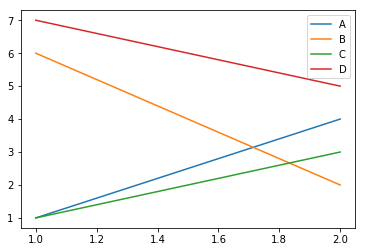

In [169]:
df.plot()# 默认以columns来画图

In [170]:
df.index

Int64Index([1, 2], dtype='int64')

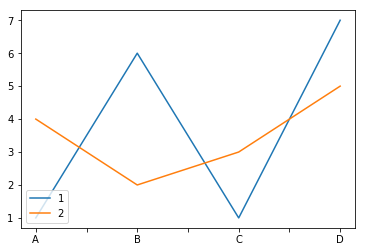

In [171]:
for i in df.index:
    df.loc[i].plot(label=str(i))#用index横向画图
plt.legend(loc=3)

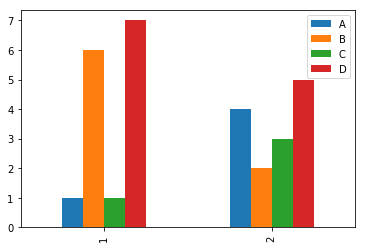

In [172]:
df.plot(kind='bar')#同一个index下的不同columns的对比

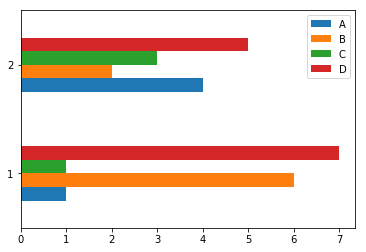

In [173]:
df.plot(kind='barh')# bar horizon 横向画图

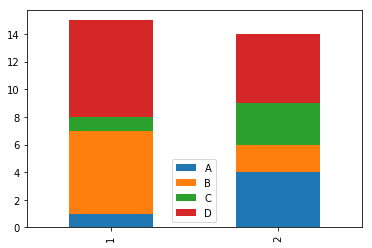

In [174]:
df.plot(kind='bar',stacked=True)# stacked 重叠吗？

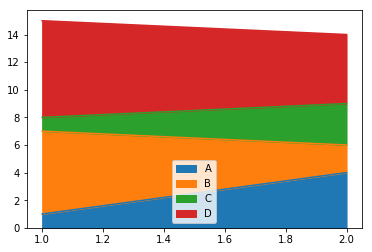

In [175]:
df.plot(kind='area')

In [176]:
df.drop# return new df without drop column   origial df changed or not depend on 'inplace' attribute
df.pop  # return that sigle column  


<bound method NDFrame.pop of    A  B  C  D
1  1  6  1  7
2  4  2  3  5>

In [177]:
df.insert(4,'E',D)


In [178]:
df.drop(columns='D')

,A,B,C,E
1,1,6,1,9
2,4,2,3,3


In [179]:
dff=pd.concat([D,df.drop(columns='D')],axis=1)
dff

,D,A,B,C,E
1,9,1,6,1,9
2,3,4,2,3,3


In [221]:
q=DataFrame({'A':[1,2,3,4],'B':['m','f','m','s'],'S':[1.1,21.2,3.2,2.1]})

In [222]:
q

,A,B,S
0,1,m,1.1
1,2,f,21.2
2,3,m,3.2
3,4,s,2.1


In [223]:
dumm_q=pd.get_dummies(q['B'],prefix='MM')

In [224]:
dumm_q

,MM_f,MM_m,MM_s
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1


In [225]:
qq=pd.concat([q,dumm_q],axis=1)

In [226]:
qq.drop(['B'],axis=1,inplace=False) # not inplace so the old dataset will not change 

,A,S,MM_f,MM_m,MM_s
0,1,1.1,0,1,0
1,2,21.2,1,0,0
2,3,3.2,0,1,0
3,4,2.1,0,0,1


In [279]:
S=qq.pop('S')
qq.insert(8,'S',S)
qq

,A,B,MM_f,MM_m,MM_s,SS,aaa,asd,S
0,1,m,0,1,0,-0.699684,-0.699684,-0.699684,1.1
1,2,f,1,0,0,1.725084,1.725084,1.725084,21.2
2,3,m,0,1,0,-0.446350,-0.446350,-0.446350,3.2
3,4,s,0,0,1,-0.579049,-0.579049,-0.579049,2.1


In [228]:
qq[]

0     1.1
1    21.2
2     3.2
3     2.1
Name: S, dtype: float64

In [248]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()
x=qq['S'].values.reshape(-1,1)
print(x)
s= scaler.fit(x)
qq['asd']=scaler.fit_transform(x,s)
qq

[[  1.1]
 [ 21.2]
 [  3.2]
 [  2.1]]


,A,B,S,MM_f,MM_m,MM_s,SS,aaa,asd
0,1,m,1.1,0,1,0,-0.699684,-0.699684,-0.699684
1,2,f,21.2,1,0,0,1.725084,1.725084,1.725084
2,3,m,3.2,0,1,0,-0.446350,-0.446350,-0.446350
3,4,s,2.1,0,0,1,-0.579049,-0.579049,-0.579049


In [230]:
>>> data = [[0, 0], [0, 0], [1, 1], [1, 1]]
>>> scaler = StandardScaler()
>>> print(scaler.fit(data))
StandardScaler(copy=True, with_mean=True, with_std=True)
>>> print(scaler.mean_)
[ 0.5  0.5]
>>> print(scaler.transform(data))
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
>>> print(scaler.transform([[2, 2]]

SyntaxError: invalid syntax (<ipython-input-230-6df75a73c619>, line 6)

In [271]:
data_test = pd.read_csv("/Users/ZHAOFENG SHANG/Desktop/NoteBook/Kaggle_Titanic/test.csv")

In [272]:
data_test.info()
data_test[data_test['Fare']==0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


In [266]:
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0

In [269]:
data_test[data_test['Fare']==0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,0.0,NaN,S
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S
